# Scatterplots using ggplot2
Original source: http://rforpublichealth.blogspot.com/2013/11/ggplot2-cheatsheet-for-scatterplots.html

In [40]:
# load the ggplot2 package
library(ggplot2)

# load the gridExtra package
library(gridExtra)

In [41]:
# load the mt cars dataset
mtc <- mtcars

In [42]:
# create a basic scatterplot base layer, p1
p1 <- ggplot(mtc, aes(x = hp, y = mpg))

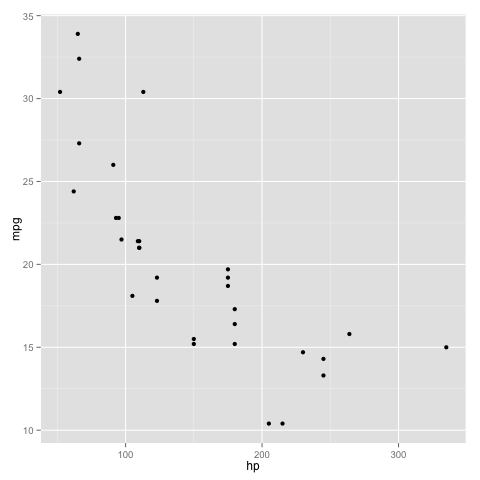

In [43]:
# print the scatter plot with points
p1 + geom_point()

In [44]:
# print the scatter plot is red points
p2 <- p1 + geom_point(color="red")

In [45]:
# print the scatter plot with point colors determined by a continuous variable
p3 <- p1 + geom_point(aes(color = wt)) 

In [46]:
# print the scatter plot with point colors determined by a factor variable
p4 <- p1 + geom_point(aes(color=factor(am)))

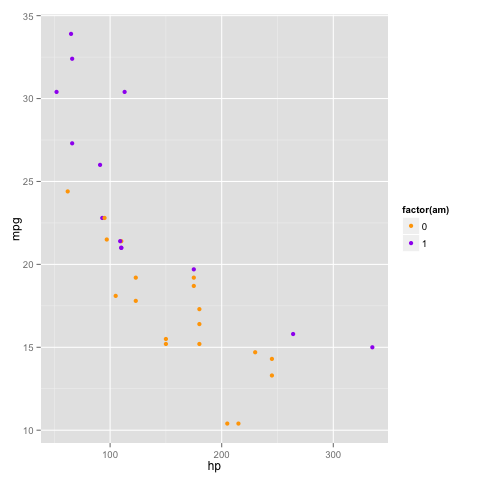

In [47]:
# print the scatter plot with point with custom colors for a factor variable
p1 + geom_point(aes(color=factor(am))) + scale_color_manual(values = c("orange", "purple"))

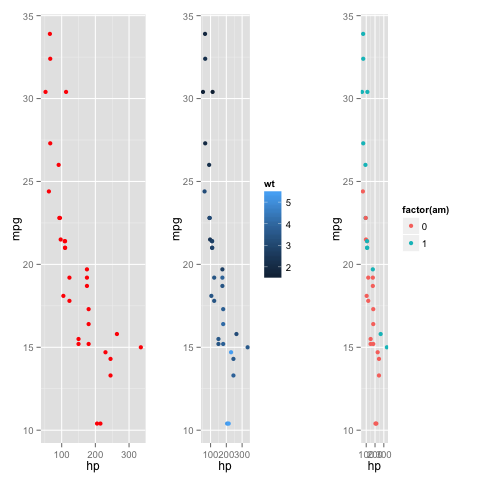

In [48]:
# print scatterplots p2, p3, and p4 in a single row
grid.arrange(p2, p3, p4, nrow=1)

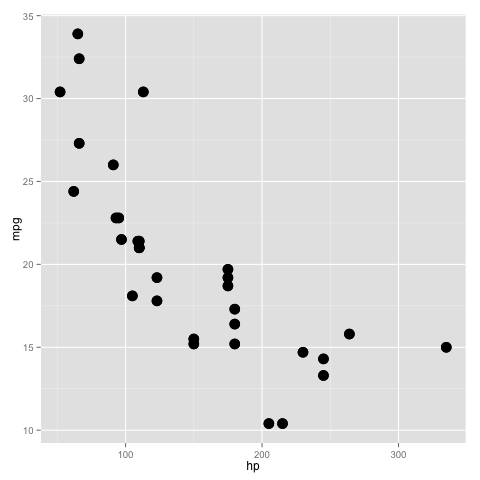

In [49]:
# create a scatter plot, p2, with large point sizes
p2 <- p1 + geom_point(size = 5)      

# print the scatter plot with large point sizes
p2 + geom_point(size = 5)

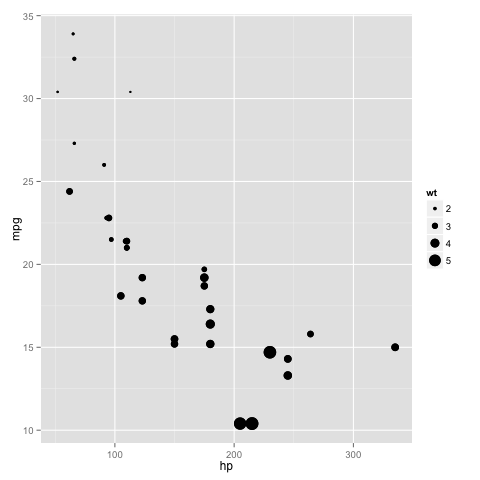

In [50]:
# create a scatter plot, p3, with large point sizes
p3 <- p1 + geom_point(aes(size = wt))

# print the scatter plot with point sizes determined by a continous variable
p3 + geom_point(aes(size = wt))

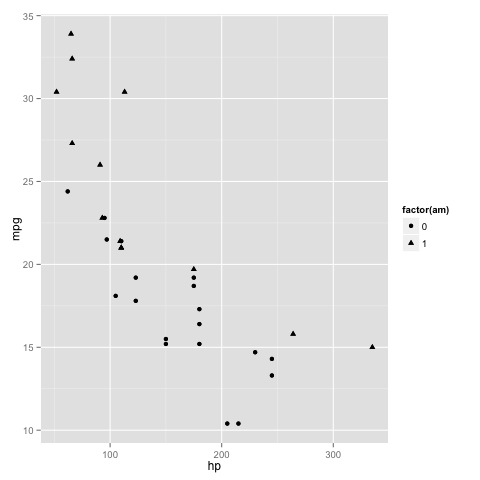

In [51]:
# create a scatter plot, p4, with large point sizes
p4 <- p1 + geom_point(aes(shape = factor(am)))

# print the scatter plot with point shape determined by a factor variable
p4 + geom_point(aes(shape = factor(am)))

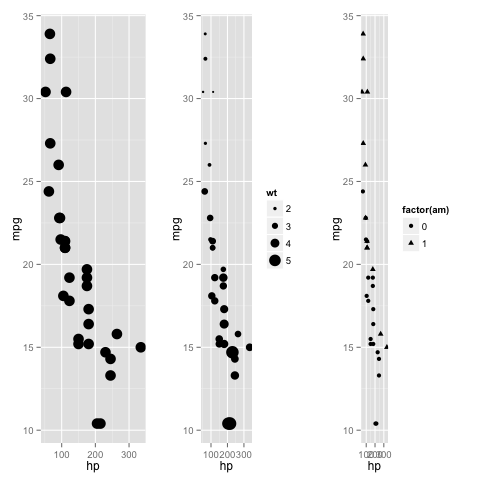

In [52]:
# print scatterplots p2, p3, and p4 in a single row
grid.arrange(p2, p3, p4, nrow=1)

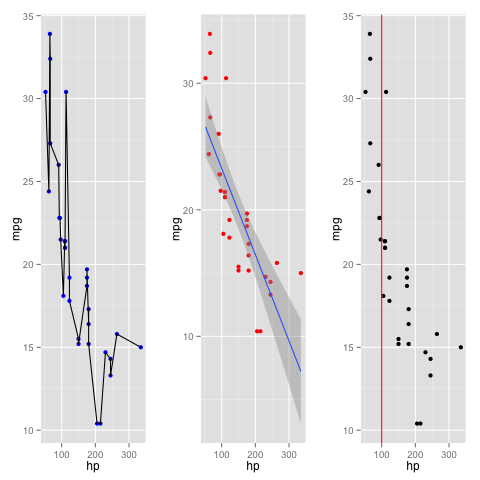

In [53]:
# create a scatter plot with blue points, connected by a line
p2 <- p1 + geom_point(color="blue") + geom_line()

# create a scatter plot with red points, and a regression line
p3 <- p1 + geom_point(color="red") + geom_smooth(method = "lm", se = TRUE)

# create a scatter plot with a red vertical line at x = 100
p4 <- p1 + geom_point() + geom_vline(xintercept = 100, color="red")

# print scatterplots p2, p3, and p4 in a single row
grid.arrange(p2, p3, p4, nrow=1)

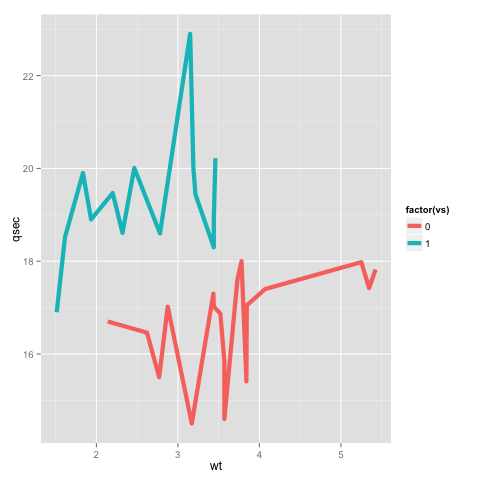

In [54]:
# print scatterplot with no points, just a line, colored by a factor
ggplot(mtc, aes(x = wt, y = qsec)) + geom_line(size=2, aes(color=factor(vs)))

In [55]:
# create a scatter plot of hp and mpg
p2 <- ggplot(mtc, aes(x = hp, y = mpg)) + geom_point()

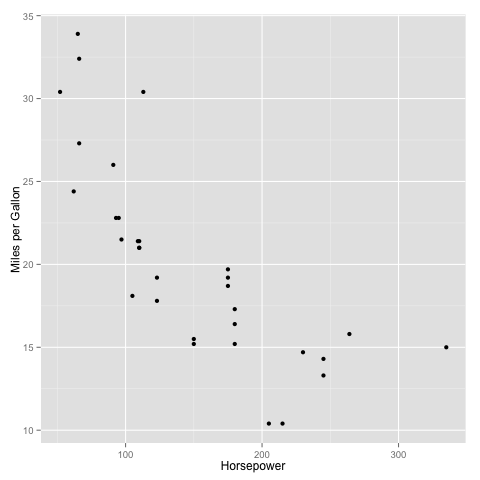

In [56]:
# create a scatter plot with x and y labels
p2 + labs(x="Horsepower", y = "Miles per Gallon")

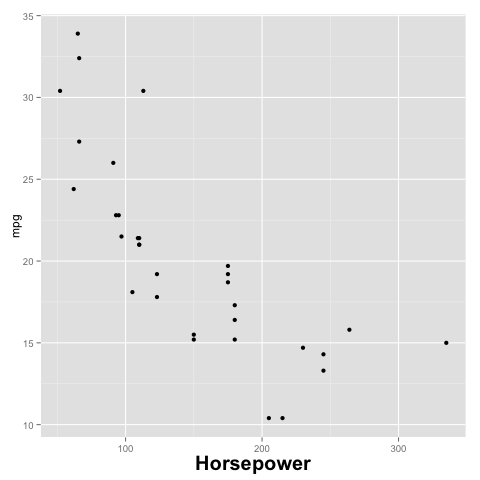

In [57]:
# create a scatter plot with a bold, large x label 
p2 + theme(axis.title.x = element_text(face="bold", size=20)) + labs(x="Horsepower")

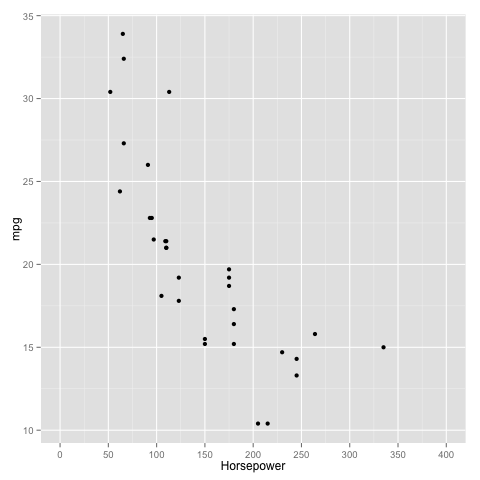

In [58]:
# print a scatter plot with a longer x axis (limits at 0 and 400) and more vertical lines (breaks start a 0, end at 400, draw a line every 50)
p2 + scale_x_continuous("Horsepower", limits=c(0,400), breaks=seq(0, 400, 50))                    

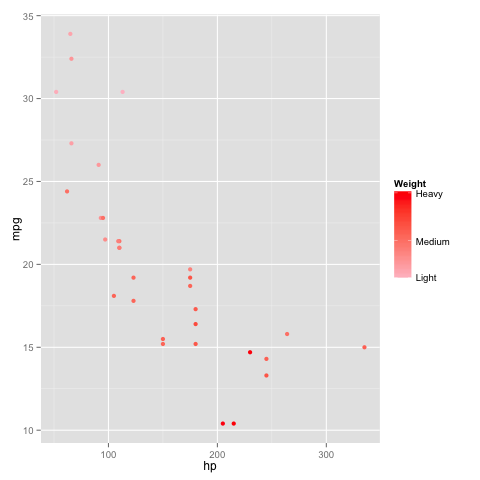

In [59]:
# create a scatter plot of points with the color determined by wt
g5 <- ggplot(mtc, aes(x = hp, y = mpg)) + geom_point(size=2, aes(color = wt))

# print a scatterplot with a legend titled "Weight, with the legend color determined by the min, max, and mean of a continous variable (wt), with the labels on the being Light, Medium, and Heavy, and the gradient goes between red and pink
g5 + scale_color_continuous(name="Weight",
                            breaks = with(mtc, c(min(wt), mean(wt), max(wt))),
                            labels = c("Light", "Medium", "Heavy"),
                            low = "pink",
                            high = "red")

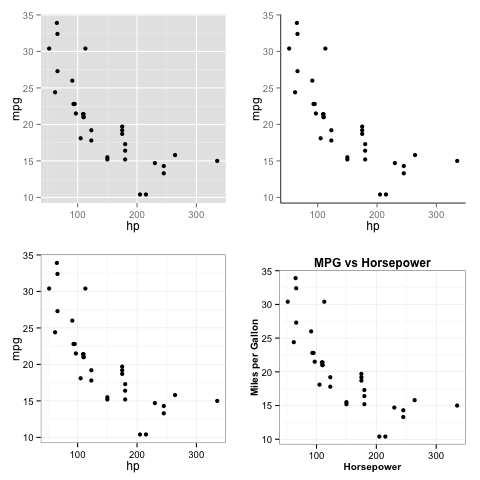

In [60]:
# create a scatterplot
g2 <- ggplot(mtc, aes(x = hp, y = mpg)) + geom_point()

# create a theme with no lines, a white background, and only axis lines
t1 <-theme(                              
  plot.background = element_blank(), 
  panel.grid.major = element_blank(), 
  panel.grid.minor = element_blank(), 
  panel.border = element_blank(), 
  panel.background = element_blank(),
  axis.line = element_line(size=.4)
)

# create a theme styling the axis labels and plot title
t2 <- theme(                              
  axis.title.x = element_text(face="bold", color="black", size=10),
  axis.title.y = element_text(face="bold", color="black", size=10),
  plot.title = element_text(face="bold", color = "black", size=12)
)

# create a scatterplot of g2, styled with theme t1
g3 <- g2 + t1

# create a scatterplot with the built-in black and white theme
g4 <- g2 + theme_bw()

# create a scatterplot with the built-in black and white theme AND the t2 custom theme
g5 <- g2 + theme_bw() + t2 + labs(x="Horsepower", y = "Miles per Gallon", title= "MPG vs Horsepower")

# print the scatter plots g2, g3, g4, g5 in two rows
grid.arrange(g2, g3, g4, g5, nrow=2)

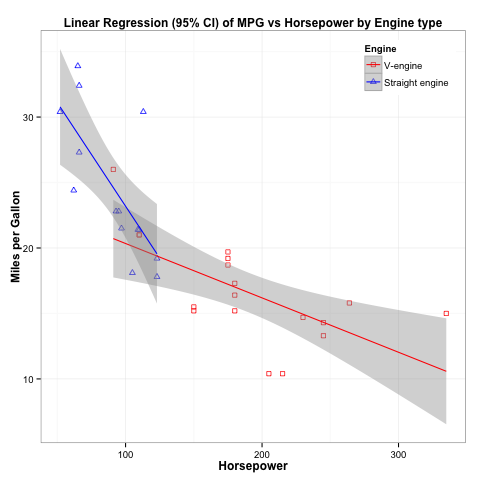

In [61]:
# create a scatter plot (notes inline)
g2 <- ggplot(mtc, aes(x = hp, y = mpg)) + 
  # create points with size two, and the color and scape determined by a factor variable
  geom_point(size=2, aes(color=factor(vs), shape=factor(vs))) +
  # add a linear regression line that displays standard error shading
  geom_smooth(aes(color=factor(vs)),method = "lm", se = TRUE) +
  # add a legend titled "Engine" with two parts: V-engine, colored red, and Straight engine, colored blue
  scale_color_manual(name ="Engine", 
                     labels=c("V-engine", "Straight engine"),
                     values=c("red","blue")) +
  # add to the legend custom shapes
  scale_shape_manual(name ="Engine", 
                     labels=c("V-engine", "Straight engine"),
                     values=c(0,2)) +
  # style the scatterplot with the built in black and white theme
  theme_bw() + 
  # stype the scatterplot with the custom theme
  theme(                              
    axis.title.x = element_text(face="bold", color="black", size=12),
    axis.title.y = element_text(face="bold", color="black", size=12),
    plot.title = element_text(face="bold", color = "black", size=12),
    legend.position=c(1,1),
    legend.justification=c(1,1)) +
  labs(x="Horsepower", 
       y = "Miles per Gallon", 
       title= "Linear Regression (95% CI) of MPG vs Horsepower by Engine type")

g2